In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
import neurokit2 as nk
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}
650000


c:\Users\reegi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\reegi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\reegi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\reegi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyError: '648000-651600'

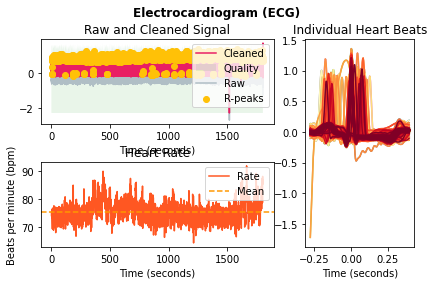

In [89]:
#Datos con arrythmia
data = {
    
}

baseline_data = r"G:\Shared drives\Proyecto Final\Progra\databases\MIT Arrythmia\100"

fs = 360
time = 10  #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
sample_from = time * fs
sample_to = 20*fs # 5s de sampleo

full_record = record = wfdb.rdrecord(baseline_data)
full_record_data = full_record.__dict__
print(full_record_data)
n_samples = full_record_data['sig_len']
print(n_samples)
try:
  ecg, info = nk.ecg_process(full_record.to_dataframe()['MLII'], sampling_rate = fs)
except:
  ecg, info = nk.ecg_process(full_record.to_dataframe()['V2'], sampling_rate = fs)

nk.ecg_plot(ecg, sampling_rate=fs)


x= True
while x == True:
  try:
    sample_from = time * fs
    sample_to = (time+10)*fs # 10s de sampleo
    data[f"{sample_from}-{sample_to}"] = {}
    data[f"{sample_from}-{sample_to}"][f"raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(f"{sample_from}-{sample_to}") 
  try:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["MLII"], sampling_rate=fs) 
  except:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["V2"], sampling_rate=fs) 
  time+=10
  if (time+10)*fs > n_samples*fs:
    print("hey!")
    x = False

data

In [ ]:
ecg["ECG_Raw"].plot()

In [ ]:
#Para cargar datos sin arrythmia
data = {
    
}

baseline_data = r"G:\Shared drives\Proyecto Final\Progra\databases\PTB\patient116\s0302lre"

fs = 1000
time = 10  #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
sample_from = time * fs
sample_to = 20*fs # 5s de sampleo

full_record = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
full_record_data = full_record.__dict__
print(full_record_data)
n_samples = full_record_data['sig_len']
print(n_samples)
ecg, info = nk.ecg_process(full_record.to_dataframe()['ii'], sampling_rate = fs)
nk.ecg_plot(ecg, sampling_rate=fs)


x= True
while x == True:
  try:
    sample_from = time * fs
    sample_to = (time+10)*fs # 10s de sampleo
    data[f"{sample_from}-{sample_to}"] = {}
    data[f"{sample_from}-{sample_to}"][f"raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(f"{sample_from}-{sample_to}") 
  try:
    data[f"{sample_from}-{sample_to}"]["ecg_signals"], data[f"{sample_from}-{sample_to}"]["info"] = nk.ecg_process(data[f"{sample_from}-{sample_to}"]["raw_data"].to_dataframe()["ii"], sampling_rate=fs) 
  except:
    pass
  time+=10
  if (time+10)*fs > n_samples*fs:
    print("hey!")
    x = False

data


In [ ]:
print(data)
for item in data:
  for feature in data[item]['ecg_signals']:
    data[item][feature] = data[item]['ecg_signals'][feature]

In [ ]:
data_df = pd.DataFrame.from_dict(data, orient= 'index')
data_df

In [ ]:
ecg_signal_data = ['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks']

def dataAdquisition(data,fs):
  for item in data:
    peaks, info = nk.ecg_peaks(data[item]["ecg_signals"]["ECG_Clean"], sampling_rate=fs)
    # data[item]["r_peaks"] = data[item][e]
    data[item]["hrv_time"] = nk.hrv_time(peaks, sampling_rate=fs, show=False)
    for var in data[item]["hrv_time"]:
      data[item][var] = data[item]["hrv_time"][var].to_frame().iloc[0][var]
    for feature in ecg_signal_data:
      data[item][feature] = data[item]["ecg_signals"][feature].sum()
    data[item]["mean_quality"]  = data[item]["ecg_signals"]["ECG_Quality"].mean()


  return data

In [ ]:
control_data_clean = dataAdquisition(data, fs)

In [ ]:
#sin arrythmia
# for item in control_data_clean:
#   dict_data = control_data_clean[item]["raw_data"].__dict__
#   control_data_clean[item]["sex"] = dict_data['comments'][1].replace('sex: ', '')
#   control_data_clean[item]["age"] = dict_data['comments'][0].replace('age: ', '')

In [ ]:
# #sin arrythmia
# control_data_df = pd.DataFrame.from_dict(control_data_clean, orient = 'index')
# control_data_df = control_data_df.join(pd.get_dummies(control_data_df["sex"])).drop("sex", axis = 1)

In [ ]:
#Revisar el codigo sin esto

#arrythmia
# for item in control_data_clean:
#   dict_data = control_data_clean[item]["raw_data"].__dict__
#   control_data_clean[item]["sex"] = dict_data['comments'][0].split(' ')[1]
#   control_data_clean[item]["age"] = dict_data['comments'][0].split(' ')[0]

control_data_df = pd.DataFrame.from_dict(control_data_clean, orient = 'index')
# control_data_df = control_data_df.join(pd.get_dummies(control_data_df["sex"])).drop("sex", axis = 1)

In [ ]:
control_data_df

In [ ]:
control_data_df = control_data_df[control_data_df["mean_quality"]>0.5]

In [ ]:
control_data_df

In [ ]:
control_data_df.drop(columns = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2','HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5'], inplace = True)


In [ ]:
control_data_clean

# momento de predicciones

In [ ]:
control_data_df.columns

In [ ]:
drop_list=['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks', 'age',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks']
for item in control_data_df.columns:
    if item not in drop_list:
      control_data_df.drop(columns = [item], inplace = True)

control_data_df

\

In [ ]:
data_ml = control_data_df
data_ml["ratio p/r peaks"] = data_ml["ECG_P_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio q/r peaks"] = data_ml["ECG_Q_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio s/r peaks"] = data_ml["ECG_S_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio t/r peaks"] = data_ml["ECG_T_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml


In [ ]:
data_ml.columns

In [ ]:
all_columns = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'age', 'ECG_R_Peaks',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks']
for item in data_ml:
  if item in all_columns:
    print(item)
  else:
    data_ml.drop(columns = [item], inplace = True)
data_ml

In [ ]:
final_df = pd.DataFrame()
for item in drop_list:
  final_df[item]=data_ml[item]


In [ ]:
final_df.drop(columns = "age", inplace = True)

In [ ]:
print(len(final_df))

In [ ]:
import joblib
filename = r'C:\Users\reegi\Documents\TEC\10S\Proyecto Integrador\modelo_logreg.joblib'

loaded_model = joblib.load(filename)
result = loaded_model.predict(final_df).tolist()
print(result)

In [ ]:
print(result.count(1))

In [ ]:
len(result)

In [ ]:
final_df["arrythmia"]= result

In [ ]:
final_df.to_csv("final.csv")

El modelo se equivoco tres veces. :(

In [ ]:
abnormality_per = result.count(1)/result.count(0)
print(abnormality_per)